<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/assessment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
!pip install category_encoders

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline

from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [15]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Read Data

car_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adverts.csv')

car_df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [27]:
car_df.shape

(402005, 12)

In [28]:

# Check uniqueness in each column
uniqueness = car_df['crossover_car_and_van'].value_counts()
uniqueness

False    400210
True       1795
Name: crossover_car_and_van, dtype: int64

In [29]:
# Drop High Cardinality columns:
car_df = car_df.drop(columns = ['public_reference','reg_code'])
car_df.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [30]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                401878 non-null  float64
 1   standard_colour        396627 non-null  object 
 2   standard_make          402005 non-null  object 
 3   standard_model         402005 non-null  object 
 4   vehicle_condition      402005 non-null  object 
 5   year_of_registration   368694 non-null  float64
 6   price                  402005 non-null  int64  
 7   body_type              401168 non-null  object 
 8   crossover_car_and_van  402005 non-null  bool   
 9   fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 28.0+ MB


In [31]:
car_df.shape

(402005, 10)

In [32]:
from sklearn.impute import SimpleImputer

# categorize according to the data type

numFeat = car_df[['mileage', 'year_of_registration']]
cateFeat = car_df[['standard_colour','standard_make','standard_model','vehicle_condition','body_type','fuel_type']]
boolFeat = car_df[['crossover_car_and_van']]
boolFeat.head()


,crossover_car_and_van
0,False
1,False
2,False
3,False
4,False


In [33]:
# Create separate imputers for numeric and categorical features
num_imputer = SimpleImputer(strategy='mean')
cate_imputer = SimpleImputer(strategy='most_frequent')

# Identify numeric, categorical, boolean columns
num_cols = car_df.select_dtypes(include=['number']).columns
cate_cols = car_df.select_dtypes(include=['object']).columns
bool_cols = car_df.select_dtypes(include=['bool']).columns

# Impute missing values for numeric and categorical features
car_df[num_cols] = num_imputer.fit_transform(car_df[num_cols])
car_df[cate_cols] = cate_imputer.fit_transform(car_df[cate_cols])


# Impute missing values for boolean features with the most frequent value
for i in bool_cols:
    most_frequent_value = car_df[i].mode()[0]
    car_df[i].fillna(most_frequent_value, inplace=True)



In [34]:
# Get the total count of missing values in each column
car_df.isnull().sum()


mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [36]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                402005 non-null  float64
 1   standard_colour        402005 non-null  object 
 2   standard_make          402005 non-null  object 
 3   standard_model         402005 non-null  object 
 4   vehicle_condition      402005 non-null  object 
 5   year_of_registration   402005 non-null  float64
 6   price                  402005 non-null  float64
 7   body_type              402005 non-null  object 
 8   crossover_car_and_van  402005 non-null  bool   
 9   fuel_type              402005 non-null  object 
dtypes: bool(1), float64(3), object(6)
memory usage: 28.0+ MB


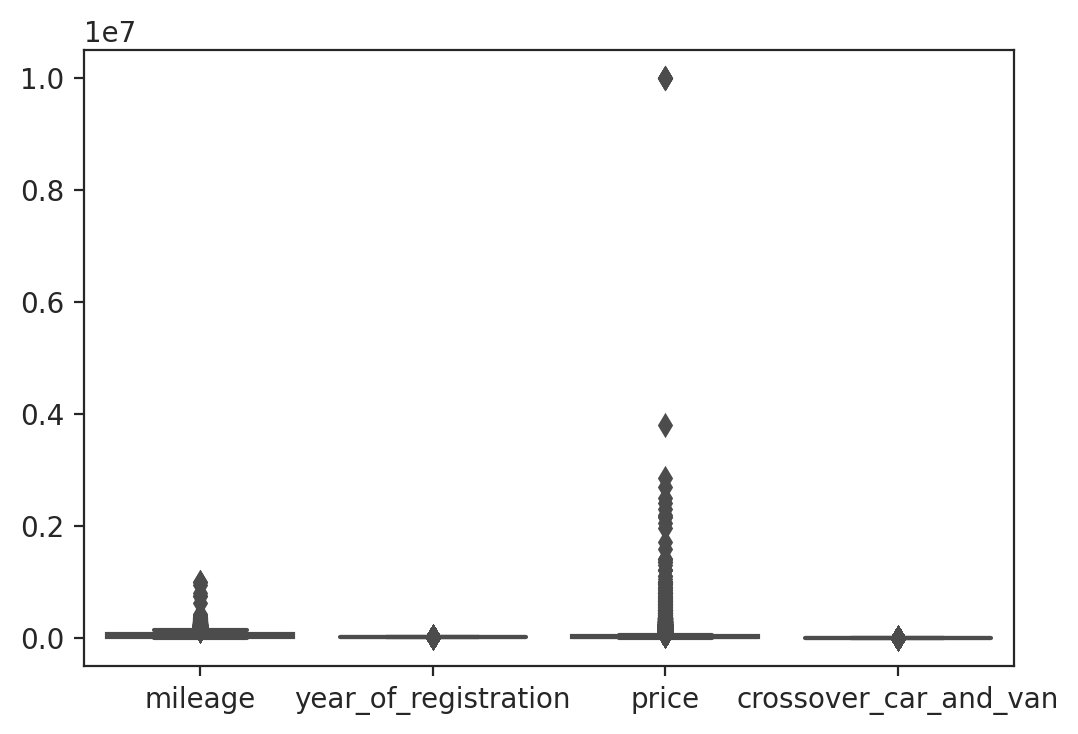

In [54]:
# Create a count plot
sns.boxplot(data=car_df, x='year_of_registration);


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Melt the DataFrame to long format for boxplot
df_melted = pd.melt(car_df, id_vars=[], value_vars=car_df.columns, var_name='standard_colour')

# Create a boxplot for multiple categorical columns
plt.figure(figsize=(12, 8))
sns.boxplot(x='standard_colour', data=df_melted, palette='Set2')
plt.title('Boxplot of Category Counts for Several Categorical Columns')
plt.show()


TypeError: ignored

<Figure size 1200x800 with 0 Axes>

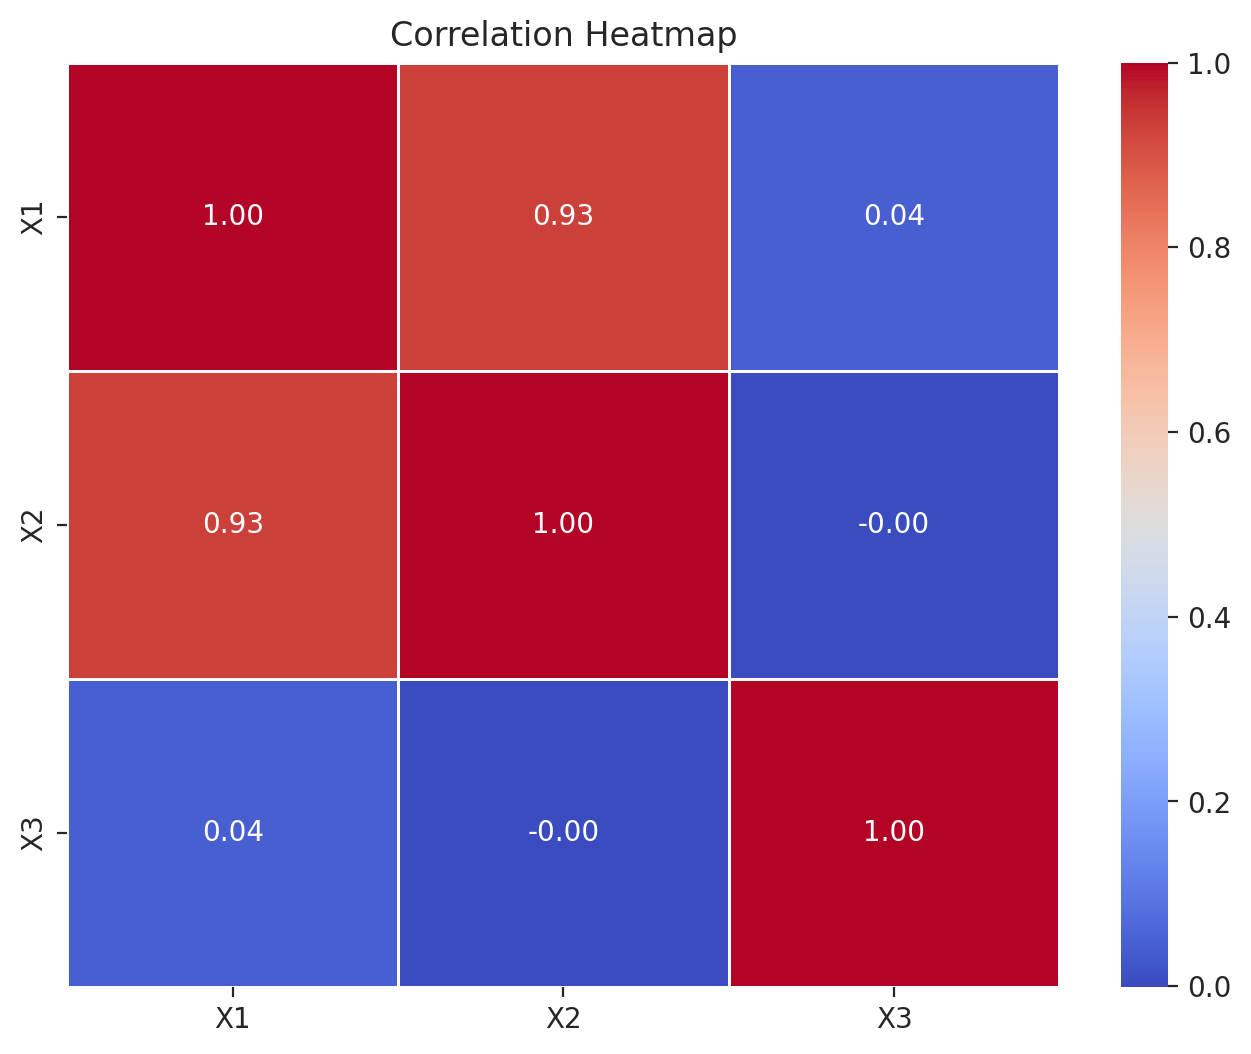

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a DataFrame with three correlated variables
data = {
    'X1': np.random.rand(100),
    'X2': 2 * np.random.rand(100) + 0.5,
    'X3': 3 * np.random.rand(100) - 1
}

df = pd.DataFrame(data)

# Introducing multicollinearity by creating a linear relationship between X1 and X2
df['X2'] = df['X1'] + np.random.normal(scale=0.1, size=len(df))

# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


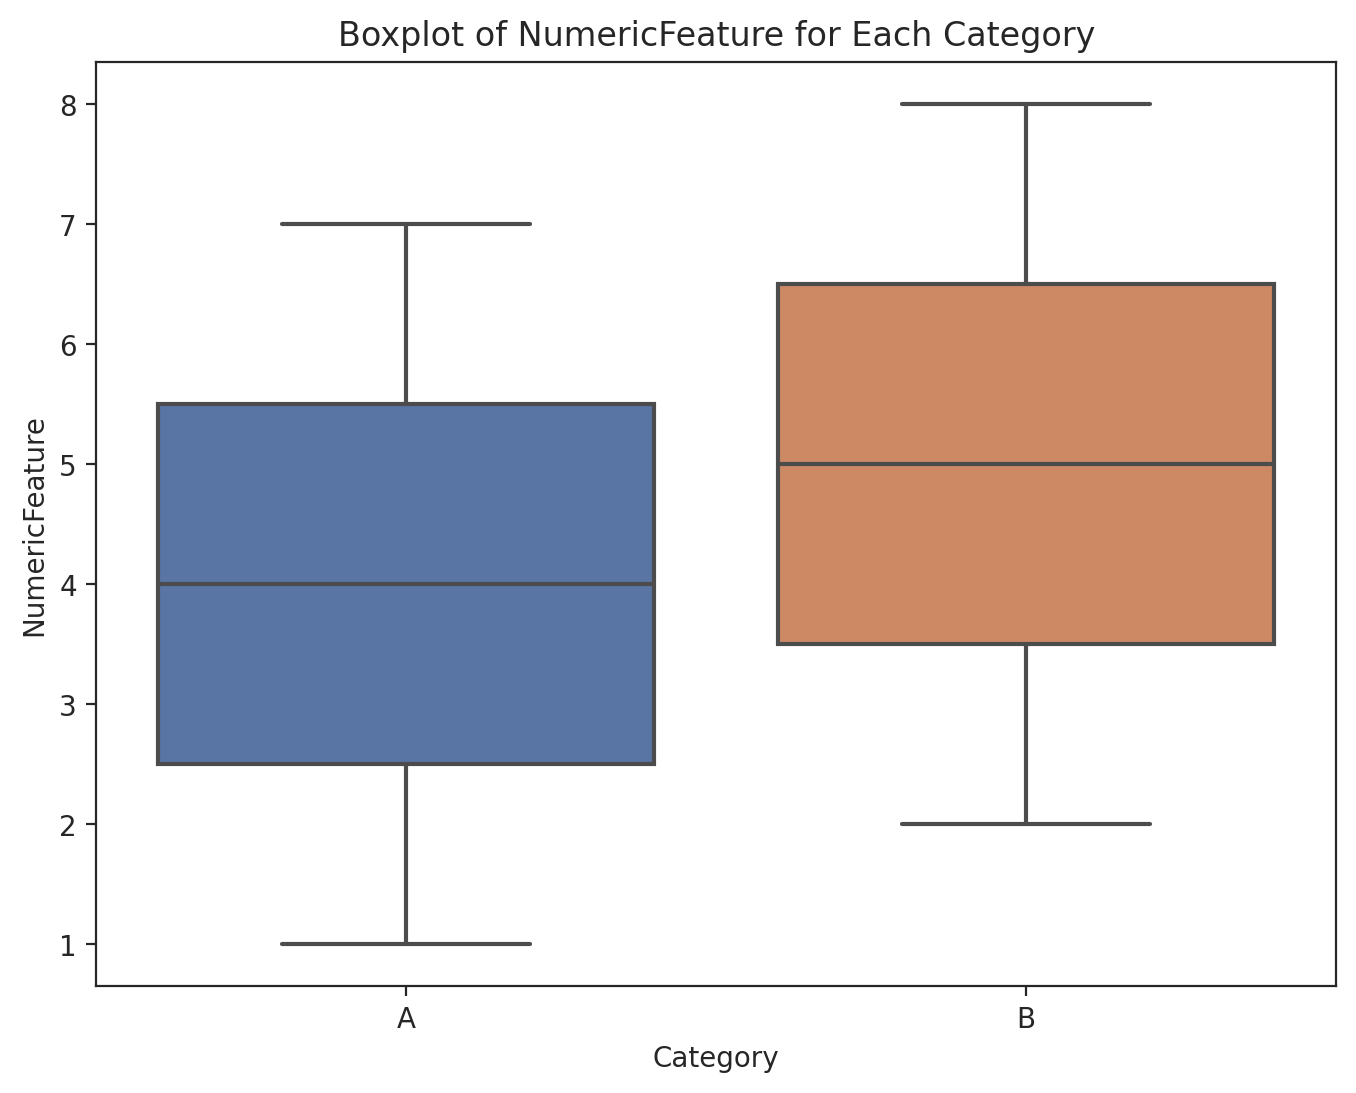

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a sample DataFrame with a categorical feature and a numerical feature
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'NumericFeature': [1, 2, 3, 4, 5, 6, 7, 8]
}

df = pd.DataFrame(data)

# Create a boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='NumericFeature', data=df)
plt.title('Boxplot of NumericFeature for Each Category')
plt.show()
